In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
con_base = VGG16(weights='imagenet',                
                  include_top = False,                 
                  input_shape=(150,300,3))

In [3]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 150, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 150, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 150, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 75, 128)       0     

In [4]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(con_base) 
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30


In [6]:
con_base.trainable = False

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import os 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator 
from keras import models 
from keras import layers 
from keras import optimizers
base_dir = 'RMB'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( train_dir,target_size=(150, 300),batch_size=10, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 300),batch_size=10,class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=4, epochs=30,validation_data=validation_generator,validation_steps=2)


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/30
4/4 [==============================] - 7s 2s/step - loss: 0.7693 - acc: 0.5000 - val_loss: 0.6792 - val_acc: 0.5500
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 0.6858 - acc: 0.4750 - val_loss: 0.6715 - val_acc: 0.5000
Epoch 3/30
4/4 [==============================] - 11s 3s/step - loss: 0.7384 - acc: 0.5250 - val_loss: 0.6326 - val_acc: 0.7000
Epoch 4/30
4/4 [==============================] - 11s 3s/step - loss: 0.6607 - acc: 0.6000 - val_loss: 0.5966 - val_acc: 0.7000
Epoch 5/30
4/4 [==============================] - 11s 3s/step - loss: 0.6419 - acc: 0.7250 - val_loss: 0.6040 - val_acc: 0.5500
Epoch 6/30
4/4 [==============================] - 12s 3s/step - loss: 0.6435 - acc: 0.6750 - val_loss: 0.5743 - val_acc: 0.7000
Epoch 7/30
4/4 [==============================] - 12s 3s/step - loss: 0.6639 - acc: 0.6250 - val_loss: 0.6103 - val_acc: 0.8000
Epoch 8/30
4/4 [==========

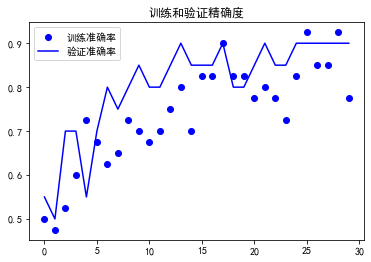

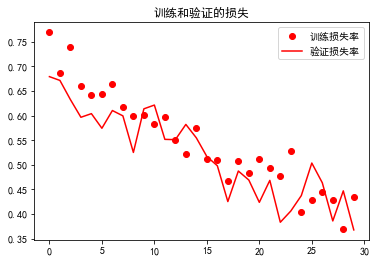

In [20]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.rcParams['font.sans-serif']="SimHei"
plt.plot(epochs, acc, 'bo', label='训练准确率') 
plt.plot(epochs, val_acc, 'b', label='验证准确率') 
plt.title('训练和验证精确度') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='训练损失率') 
plt.plot(epochs, val_loss, 'r', label='验证损失率') 
plt.title('训练和验证的损失') 
plt.legend()
plt.show()

In [21]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 300),batch_size=10,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=2) 
print('测试准确率:', test_acc)

Found 20 images belonging to 2 classes.
测试准确率: 0.8500000238418579


In [10]:
from keras.models import load_model

In [11]:
# 读取图片 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
# mpimg 用于读取图片 
test_img = mpimg.imread('12.jpg')

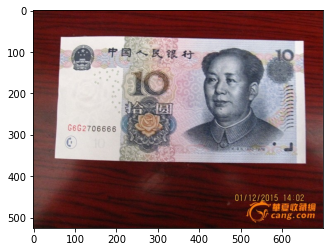

In [12]:
plt.imshow(test_img) 
plt.show()

In [13]:
test_img.shape

(525, 700, 3)

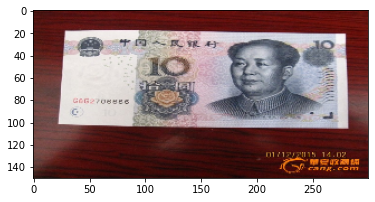

(150, 300, 3)

In [14]:
import cv2 
test_img = cv2.resize(test_img,(300,150)) 
plt.imshow(test_img) 
plt.show() 
test_img.shape

In [15]:
test_img = test_img.reshape(1,150,300,3) 
test_img.shape

(1, 150, 300, 3)

In [16]:
model.predict(test_img)

array([[0.99998295]], dtype=float32)

In [17]:
model.predict_classes(test_img)

array([[1]])